[Chapter Here](https://www.nltk.org/book/ch02.html)

# 1 - Accessing Text Corpora

Corpuses Explored in this chapter include:
1. [Gutenberg Corpus](http://www.gutenberg.org/)
    * classic literature
2. NLTK WebText
    * more informal texts
3. [Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)
    * one of the earliest big text corpuses (1 million wods, 1961)
    * has text that is divided in gneres (bet for comparing styles of writing)
4. Reuters Corpus
    * stores 10,788 news documents
5. Inagural Address Corpus
    * interesting because of it's time dimension (1789 - 2005)
6. Annotated Text Corpora
    * basically even more stuff from NLTK


* [Guide to Creating NLTK Corpora](https://stackoverflow.com/questions/4951751/creating-a-new-corpus-with-nltk)

## 1.1 Gutenberg Corpus

In [1]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

* raw gives number of chars
* words gives number of words
* sents gives number of scentences
* vocab represents unique words in the text

In [10]:
from nltk.corpus import gutenberg

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [13]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [15]:
type(macbeth_sentences)

nltk.corpus.reader.util.StreamBackedCorpusView

In [20]:
list(macbeth_sentences)[0:8]

[['[',
  'The',
  'Tragedie',
  'of',
  'Macbeth',
  'by',
  'William',
  'Shakespeare',
  '1603',
  ']'],
 ['Actus', 'Primus', '.'],
 ['Scoena', 'Prima', '.'],
 ['Thunder', 'and', 'Lightning', '.'],
 ['Enter', 'three', 'Witches', '.'],
 ['1', '.'],
 ['When', 'shall', 'we', 'three', 'meet', 'againe', '?'],
 ['In', 'Thunder', ',', 'Lightning', ',', 'or', 'in', 'Raine', '?']]

## 1.2 Web and Chat

In [21]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid)

firefox.txt
grail.txt
overheard.txt
pirates.txt
singles.txt
wine.txt


## 1.3 Brown Corpus

* [Documentation on NLTK Tagged Corpus Reader](https://www.nltk.org/_modules/nltk/corpus/reader/tagged.html)

In [22]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [39]:
brown.words(fileids = brown.fileids()[0])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

### Conditional Frequency Distribution

In [40]:
cfd = nltk.ConditionalFreqDist(
...           (genre, word)
...           for genre in brown.categories()
...           for word in brown.words(categories=genre))

In [41]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## 1.6 Annotated Text Corpora
* [Complete list of NLTK Corpora](http://www.nltk.org/nltk_data/)
* we will be using the *Universal Decleration of Human Rights* for translating
    
| Corpus                                | Compiler              | Contents                                  |
|---------------------------------------|-----------------------|-------------------------------------------|
| Brown Corpus                          | Francis, Kucera       | 15 genres, 1.15M words, tagged,           |
| CESS Treebanks                        | CLiC-UB               | categorized                               |
| Chat-80 Data Files                    | Pereira &amp; Warren  | 1M words, tagged and parsed (Catalan,     |
| CMU Pronouncing Dictionary            | CMU                   | Spanish)                                  |
| CoNLL 2000 Chunking Data              | CoNLL                 | World Geographic Database                 |
| CoNLL 2002 Named Entity               | CoNLL                 | 127k entries                              |
| CoNLL 2007 Dependency Treebanks (sel) | CoNLL                 | 270k words, tagged and chunked            |
| Dependency Treebank                   | Narad                 | 700k words, pos- and named-entity-tagged  |
| FrameNet                              | Fillmore, Baker et al | (Dutch, Spanish)                          |
| Floresta Treebank                     | Diana Santos et al    | 150k words, dependency parsed (Basque,    |
| Gazetteer Lists                       | Various               | Catalan)                                  |
| Genesis Corpus                        | Misc web sources      | Dependency parsed version of Penn         |
| Gutenberg (selections)                | Hart, Newby, et al    | Treebank sample                           |
| Inaugural Address Corpus              | CSpan                 | 10k word senses, 170k manually annotated  |
| Indian POS-Tagged Corpus              | Kumaran et al         | sentences                                 |
| MacMorpho Corpus                      | NILC, USP, Brazil     | 9k sentences, tagged and parsed           |
| Movie Reviews                         | Pang, Lee             | (Portuguese)                              |
| Names Corpus                          | Kantrowitz, Ross      | Lists of cities and countries             |
| NIST 1999 Info Extr (selections)      | Garofolo              | 6 texts, 200k words, 6 languages          |
| Nombank                               | Meyers                | 18 texts, 2M words                        |
| NPS Chat Corpus                       | Forsyth, Martell      | US Presidential Inaugural Addresses       |
| Open Multilingual WordNet             | Bond et al            | (1789-present)                            |
| PP Attachment Corpus                  | Ratnaparkhi           | 60k words, tagged (Bangla, Hindi,         |
| Proposition Bank                      | Palmer                | Marathi, Telugu)                          |
| Question Classification               | Li, Roth              | 1M words, tagged (Brazilian Portuguese)   |
| Reuters Corpus                        | Reuters               | 2k movie reviews with sentiment polarity  |
| Roget's Thesaurus                     | Project Gutenberg     | classification                            |
| RTE Textual Entailment                | Dagan et al           | 8k male and female names                  |
| SEMCOR                                | Rus, Mihalcea         | 63k words, newswire and named-entity SGML |
| Senseval 2 Corpus                     | Pedersen              | markup                                    |
| SentiWordNet                          | Esuli, Sebastiani     | 115k propositions, 1400 noun frames       |
| Shakespeare texts (selections)        | Bosak                 | 10k IM chat posts, POS-tagged and         |
| State of the Union Corpus             | CSPAN                 | dialogue-act tagged                       |
| Stopwords Corpus                      | Porter et al          | 15 languages, aligned to English WordNet  |
| Swadesh Corpus                        | Wiktionary            | 28k prepositional phrases, tagged as noun |
| Switchboard Corpus (selections)       | LDC                   | or verb modifiers                         |
| Univ Decl of Human Rights             | United Nations        | 113k propositions, 3300 verb frames       |
| Penn Treebank (selections)            | LDC                   | 6k questions, categorized                 |
| TIMIT Corpus (selections)             | NIST/LDC              | 1.3M words, 10k news documents,           |
| VerbNet 2.1                           | Palmer et al          | categorized                               |
| Wordlist Corpus                       | OpenOffice.org et al  | 200k words, formatted text                |
| WordNet 3.0 (English)                 | Miller, Fellbaum      | 8k sentence pairs, categorized            |

## 1.7 Other Languages (UDHR)
* Universal Decleration of Human Rights
* 300 languages

How to read this graph:
* samples represents the max number of letters each text's words have 
* 10 for example would read "the text has no word that is more than 10 characters long"
* 5 or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text

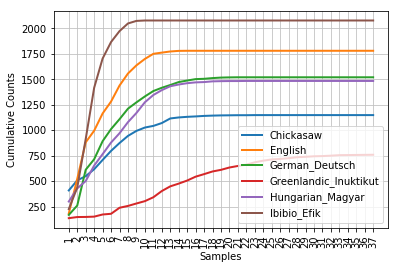

In [52]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) for lang in languages for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

## 1.8 Text Corpus Structures

![Text Structure](https://www.nltk.org/images/text-corpus-structure.png)

### Corpus Commands

| Example                   | Description                                               |
|---------------------------|-----------------------------------------------------------|
| fileids()                 | the files of the corpus                                   |
| fileids([categories])     | the files of the corpus corresponding to these categories |
| categories()              | the categories of the corpus                              |
| categories([fileids])     | the categories of the corpus corresponding to these files |
| raw()                     | the raw content of the corpus                             |
| raw(fileids=[f1,f2,f3])   | the raw content of the specified files                    |
| raw(categories=[c1,c2])   | the raw content of the specified categories               |
| words()                   | the words of the whole corpus                             |
| words(fileids=[f1,f2,f3]) | the words of the specified fileids                        |
| words(categories=[c1,c2]) | the words of the specified categories                     |
| sents()                   | the sentences of the whole corpus                         |
| sents(fileids=[f1,f2,f3]) | the sentences of the specified fileids                    |
| sents(categories=[c1,c2]) | the sentences of the specified categories                 |
| abspath(fileid)           | the location of the given file on disk                    |
| encoding(fileid)          | the encoding of the file (if known)                       |
| open(fileid)              | open a stream for reading the given corpus file           |
| root                      | if the path to the root of locally installed corpus       |
| readme()                  | the contents of the README file of the corpus             |

### Copying Tables from NLTK Book
* copy tables from HTML source
* paste into the [HTML to CSV editor](https://www.convertcsv.com/html-table-to-csv.htm)
    * add *table* and */table* HTML tags at the beginning and end
* put that converted CSV in a [Markdown Tables Generator](https://www.tablesgenerator.com/markdown_tables)

# 2 - Conditional Frequency Distributions

| Example                              | Description                                                      |
|--------------------------------------|------------------------------------------------------------------|
| cfdist = ConditionalFreqDist(pairs)  | create a conditional frequency distribution from a list of pairs |
| cfdist.conditions()                  | the conditions                                                   |
| cfdist[condition]                    | the frequency distribution for this condition                    |
| cfdist[condition][sample]            | frequency for the given sample for this condition                |
| cfdist.tabulate()                    | tabulate the conditional frequency distribution                  |
| cfdist.tabulate(samples, conditions) | tabulation limited to the specified samples and conditions       |
| cfdist.plot()                        | graphical plot of the conditional frequency distribution         |
| cfdist.plot(samples, conditions)     | graphical plot limited to the specified samples and conditions   |
| cfdist1 < cfdist2                    | test if samples in cfdist1 occur less frequently than in cfdist2 |

## 2.4   Generating Random Text with Bigrams

In [8]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)

In [3]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [4]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [5]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

# 4 - Lexical Resources

# 5

# 6

# 7

# 8 - Exercises